In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('GrabDataAnalysisExercise_funneloptimization.xlsx',sheet_name='raw_data')

In [3]:
data

,Merchants,Branches,Eaters,BTR,request,ride,promo_ride,gmv,promo_gmv,promo_cost,Revenue,% Deal,Delivery fee
0,A1,3,7,0.55,8,8,4,2852,1559,252,672,0.00,14
1,A2,1,5,0.60,7,7,1,992,291,53,235,0.08,21
2,A3,1,6,0.79,9,9,4,2193,1082,196,437,0.00,15
3,A4,1,6,0.68,10,9,5,3780,1711,226,572,0.00,19
4,A5,1,10,0.62,18,17,8,3417,1944,418,988,0.00,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,A253,1,6,0.66,8,8,3,1628,841,195,477,0.05,10
253,A254,9,33,0.61,44,44,17,11073,4882,870,2378,0.11,11
254,A255,1,7,0.74,9,9,3,1532,641,101,394,0.00,19
255,A256,1,8,0.74,13,13,5,2675,1293,268,787,0.00,9


In [4]:
df = data.copy().sort_values('gmv',ascending=False)
df.head()

,Merchants,Branches,Eaters,BTR,request,ride,promo_ride,gmv,promo_gmv,promo_cost,Revenue,% Deal,Delivery fee
224,A225,11,257,0.57,377,360,159,107980,48949,4833,13954,0.28,20
167,A168,10,108,0.63,189,185,85,48361,24040,3379,6980,0.38,21
19,A20,8,76,0.56,94,92,49,38526,20562,2569,5507,0.62,23
102,A103,27,68,0.71,171,167,36,23158,7153,1539,3330,0.00,17
20,A21,9,51,0.50,64,61,25,22872,8942,830,2872,0.13,21


In [5]:
data.corr()

,Branches,Eaters,BTR,request,ride,promo_ride,gmv,promo_gmv,promo_cost,Revenue,% Deal,Delivery fee
Branches,1.000000,0.412718,-0.109054,0.497189,0.496858,0.427297,0.417078,0.389149,0.452640,0.408300,0.157013,0.126828
Eaters,0.412718,1.000000,-0.059696,0.980973,0.979317,0.971412,0.970313,0.944278,0.928561,0.967744,0.168249,0.028017
BTR,-0.109054,-0.059696,1.000000,-0.009450,-0.004262,-0.126736,-0.122910,-0.178449,-0.193424,-0.088507,-0.437515,-0.213185
request,0.497189,0.980973,-0.009450,1.000000,0.999635,0.958417,0.948642,0.912650,0.919923,0.952036,0.138005,0.021248
ride,0.496858,0.979317,-0.004262,0.999635,1.000000,0.956817,0.946266,0.910009,0.919670,0.951046,0.135716,0.018775
promo_ride,0.427297,0.971412,-0.126736,0.958417,0.956817,1.000000,0.988701,0.983884,0.971996,0.980472,0.194362,0.090918
gmv,0.417078,0.970313,-0.122910,0.948642,0.946266,0.988701,1.000000,0.991905,0.959971,0.985425,0.186341,0.113224
promo_gmv,0.389149,0.944278,-0.178449,0.912650,0.910009,0.983884,0.991905,1.000000,0.970739,0.974900,0.226620,0.136744
promo_cost,0.452640,0.928561,-0.193424,0.919923,0.919670,0.971996,0.959971,0.970739,1.000000,0.963920,0.259483,0.085673
Revenue,0.408300,0.967744,-0.088507,0.952036,0.951046,0.980472,0.985425,0.974900,0.963920,1.000000,0.159918,0.040870


In [6]:
#Feature scaling
df['Eaters_scaled'] = (df['Eaters'] - df['Eaters'].min()) /(df['Eaters'].max() - df['Eaters'].min())
df['gmv_scaled'] = (df['gmv'] - df['gmv'].min()) /(df['gmv'].max() - df['gmv'].min())

In [7]:
df[df['gmv'] > 20000]

,Merchants,Branches,Eaters,BTR,request,ride,promo_ride,gmv,promo_gmv,promo_cost,Revenue,% Deal,Delivery fee,Eaters_scaled,gmv_scaled
224,A225,11,257,0.57,377,360,159,107980,48949,4833,13954,0.28,20,1.000000,1.000000
167,A168,10,108,0.63,189,185,85,48361,24040,3379,6980,0.38,21,0.413386,0.444278
19,A20,8,76,0.56,94,92,49,38526,20562,2569,5507,0.62,23,0.287402,0.352603
102,A103,27,68,0.71,171,167,36,23158,7153,1539,3330,0.00,17,0.255906,0.209355
20,A21,9,51,0.50,64,61,25,22872,8942,830,2872,0.13,21,0.188976,0.206689


<AxesSubplot:xlabel='gmv', ylabel='Count'>

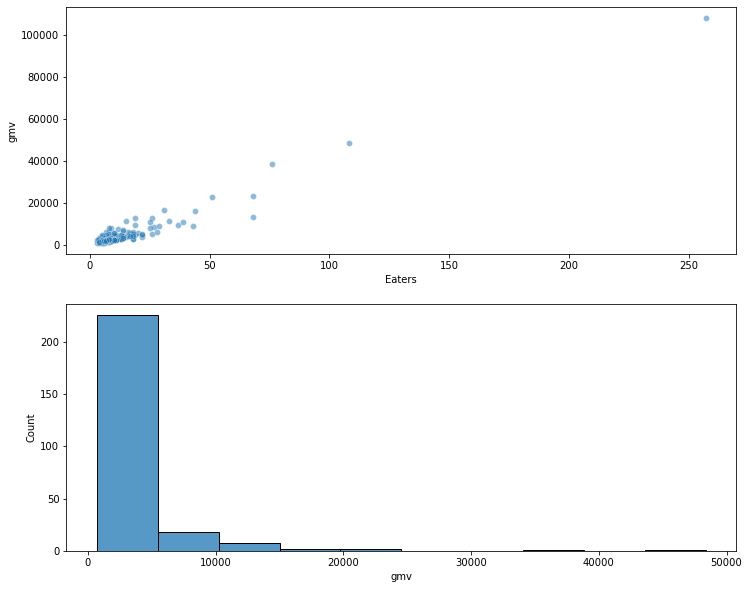

In [8]:
fig, ax = plt.subplots(2,figsize = (12,10))
sns.scatterplot(x = df['Eaters'],y = data['gmv'],alpha = 0.5, ax=ax[0])
sns.histplot(df['gmv'].iloc[1:], bins = 10, ax=ax[1])

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [10]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [11]:
y_pred = km.fit_predict(df[['Eaters','gmv']])
y_pred_scaled = km.fit_predict(df[['Eaters_scaled','gmv_scaled']])
y_pred

array([1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
df['cluster'] = y_pred
df['cluster_scaled'] = y_pred_scaled
df#[df['cluster'] == 1]

,Merchants,Branches,Eaters,BTR,request,ride,promo_ride,gmv,promo_gmv,promo_cost,Revenue,% Deal,Delivery fee,Eaters_scaled,gmv_scaled,cluster,cluster_scaled
224,A225,11,257,0.57,377,360,159,107980,48949,4833,13954,0.28,20,1.000000,1.000000,1,1
167,A168,10,108,0.63,189,185,85,48361,24040,3379,6980,0.38,21,0.413386,0.444278,2,2
19,A20,8,76,0.56,94,92,49,38526,20562,2569,5507,0.62,23,0.287402,0.352603,2,2
102,A103,27,68,0.71,171,167,36,23158,7153,1539,3330,0.00,17,0.255906,0.209355,2,2
20,A21,9,51,0.50,64,61,25,22872,8942,830,2872,0.13,21,0.188976,0.206689,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,A186,1,6,0.60,8,7,1,836,161,36,155,0.00,19,0.011811,0.001286,0,0
39,A40,1,5,0.62,7,7,1,824,136,33,191,0.00,20,0.007874,0.001174,0,0
235,A236,1,4,0.63,6,6,1,794,198,34,220,0.07,19,0.003937,0.000895,0,0
213,A214,1,5,0.68,7,7,1,776,180,41,216,0.03,9,0.007874,0.000727,0,0


<AxesSubplot:xlabel='Eaters_scaled', ylabel='gmv_scaled'>

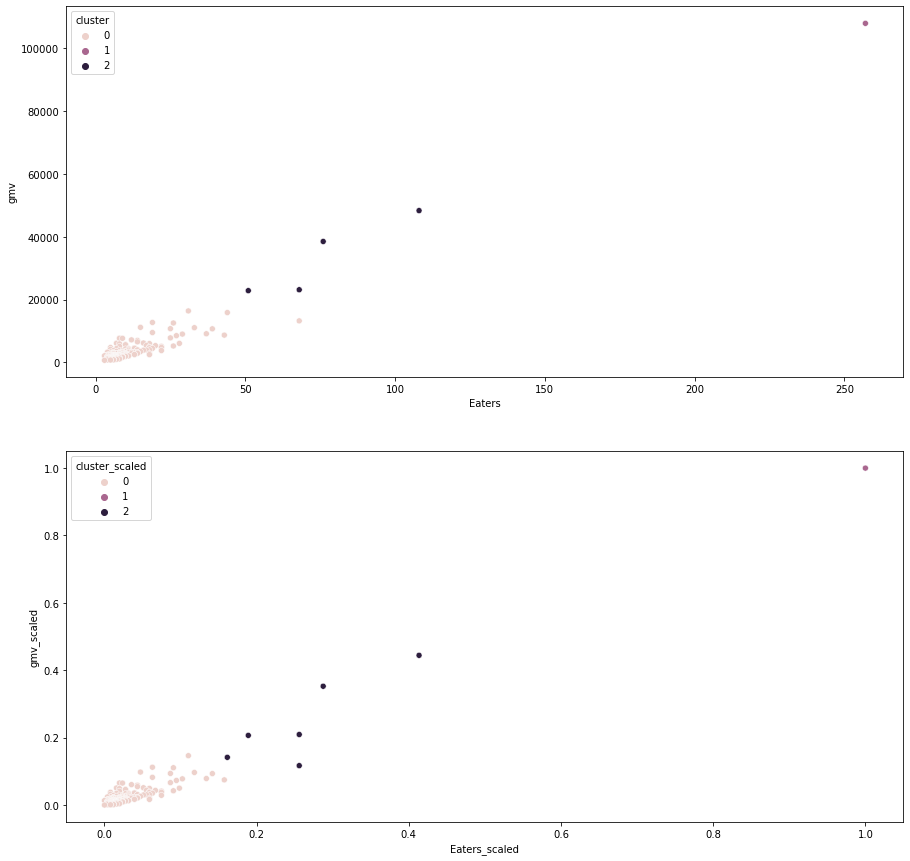

In [13]:
fig, ax = plt.subplots(2,figsize = (15,15))
sns.scatterplot(x = df['Eaters'],y = df['gmv'],alpha = 1, hue=df['cluster'],ax=ax[0])
sns.scatterplot(x = df['Eaters_scaled'],y = df['gmv_scaled'],alpha = 1, hue=df['cluster_scaled'],ax=ax[1])

In [14]:
df2 = df.copy()
df2 = df2[df['cluster_scaled'] == 0]

<AxesSubplot:xlabel='Eaters', ylabel='gmv'>

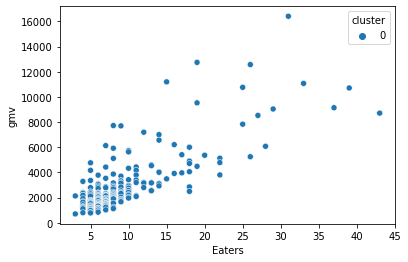

In [15]:
sns.scatterplot(x = df2['Eaters'],y = df2['gmv'],alpha = 1, hue=df2['cluster'])

In [16]:
kmean(df2,'Eaters','gmv',n_cluster=3)

NameError: name 'kmean' is not defined

In [ ]:
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Eaters','gmv']])
    sse.append(km.inertia_)

In [ ]:
sse2 = []
k_rng2 = range(1,11)
for k in k_rng2:
    km = KMeans(n_clusters = k)
    km.fit(df[['Eaters_scaled','gmv_scaled']])
    sse2.append(km.inertia_)

In [ ]:
fig, ax = plt.subplots(2,figsize = (10,6))
sns.lineplot(k_rng,sse,ax=ax[0])
sns.lineplot(k_rng2,sse2,ax=ax[1])

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps = 0.02, min_samples = 3)

In [ ]:
labels = dbscan.fit_predict(df[['Eaters_scaled','gmv_scaled']])

In [ ]:
np.unique(labels)

In [ ]:
df['db_label'] = labels

In [ ]:
sns.scatterplot(x = df['Eaters_scaled'],y = df['gmv_scaled'],alpha = 0.5, hue=df['db_label'])

In [17]:
def kmean(data,x,y,n_cluster = 2):
    from sklearn.cluster import KMeans
    #scaling
    data['x_scaled'] = (data[x] - data[x].min()) /(data[x].max() - data[x].min())
    data['y_scaled'] = (data[y] - data[y].min()) /(data[y].max() - data[y].min())
    km = KMeans(n_clusters = n_cluster)
    y_pred = km.fit_predict(data[['x_scaled','y_scaled']])
    data['cluster'] = y_pred
    p = sns.scatterplot(x = data['x_scaled'],y = data['y_scaled'],alpha = 0.5, hue=data['cluster'])
    p.set_xlabel(x, fontsize = 10)
    p.set_ylabel(y, fontsize = 10)
    

In [18]:
def kmean_elbow(data,x,y):
    sse = []
    k_rng = range(1,11)
    for k in k_rng:
        km = KMeans(n_clusters = k)
        km.fit(data[[x,y]])
        sse.append(km.inertia_)
    sns.lineplot(k_rng,sse)

In [ ]:
kmean(df,'Eaters','gmv',n_cluster=3)

In [ ]:
kmean_elbow(df,'gmv','Eaters')

In [ ]:
sns.histplot(df['BTR'],bins = 10)

In [19]:
df.corr()

,Branches,Eaters,BTR,request,ride,promo_ride,gmv,promo_gmv,promo_cost,Revenue,% Deal,Delivery fee,Eaters_scaled,gmv_scaled,cluster,cluster_scaled
Branches,1.000000,0.412718,-0.109054,0.497189,0.496858,0.427297,0.417078,0.389149,0.452640,0.408300,0.157013,0.126828,0.412718,0.417078,0.483326,0.406224
Eaters,0.412718,1.000000,-0.059696,0.980973,0.979317,0.971412,0.970313,0.944278,0.928561,0.967744,0.168249,0.028017,1.000000,0.970313,0.606402,0.619534
BTR,-0.109054,-0.059696,1.000000,-0.009450,-0.004262,-0.126736,-0.122910,-0.178449,-0.193424,-0.088507,-0.437515,-0.213185,-0.059696,-0.122910,-0.076063,-0.069106
request,0.497189,0.980973,-0.009450,1.000000,0.999635,0.958417,0.948642,0.912650,0.919923,0.952036,0.138005,0.021248,0.980973,0.948642,0.644326,0.638796
ride,0.496858,0.979317,-0.004262,0.999635,1.000000,0.956817,0.946266,0.910009,0.919670,0.951046,0.135716,0.018775,0.979317,0.946266,0.647238,0.643193
promo_ride,0.427297,0.971412,-0.126736,0.958417,0.956817,1.000000,0.988701,0.983884,0.971996,0.980472,0.194362,0.090918,0.971412,0.988701,0.626847,0.591553
gmv,0.417078,0.970313,-0.122910,0.948642,0.946266,0.988701,1.000000,0.991905,0.959971,0.985425,0.186341,0.113224,0.970313,1.000000,0.644966,0.601305
promo_gmv,0.389149,0.944278,-0.178449,0.912650,0.910009,0.983884,0.991905,1.000000,0.970739,0.974900,0.226620,0.136744,0.944278,0.991905,0.631064,0.579839
promo_cost,0.452640,0.928561,-0.193424,0.919923,0.919670,0.971996,0.959971,0.970739,1.000000,0.963920,0.259483,0.085673,0.928561,0.959971,0.678257,0.643130
Revenue,0.408300,0.967744,-0.088507,0.952036,0.951046,0.980472,0.985425,0.974900,0.963920,1.000000,0.159918,0.040870,0.967744,0.985425,0.635008,0.619534


In [24]:
df[['ride','promo_ride']].sum()

ride          4393
promo_ride    1614
dtype: int64

In [25]:
1615/4393

0.36763032096517184